In [1]:
#importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
from sklearn.metrics import r2_score
import pprint

In [2]:
#Reading the data

data = pd.read_csv("//Users/iainquinn/Crystalisation Internship/Data/DataRaw.csv")

#Making four new columns

data['ln_t_ind'] = np.log(data['induction_time'])
data['ln_S'] = np.log(data['Supersaturation'])
data['ln_(S-1)'] = np.log(data['Supersaturation']-1)
data['1/S'] = 1/(data['Supersaturation'])

#making two new datasets

data_antisolvent = data.loc[data.Method == "Antisolvent"]
data_cooling = data.loc[data.Method == "Cooling"]

In [12]:
#Making lists of each unique molecule, source and solvent in the dataset

molecule_list = data.Molecule.unique()
molecule_list_antisolvent = data_antisolvent.Molecule.unique()
molecule_list_cooling = data_cooling.Molecule.unique()

source_list = data.Source.unique()
source_list_antisolvent = data_antisolvent.Source.unique()
source_list_cooling = data_cooling.Source.unique()

solvent_list= data.solvent.unique()
solvent_list_antisolvent = data_antisolvent.solvent.unique()
solvent_list_cooling = data_cooling.solvent.unique()

In [48]:
#Transforming dataframe to  a simplified dataframe

method_1, method_2, method_3 = [], [], []
score_1, score_2, score_3 = [], [], []
slope_1, slope_2, slope_3 = [], [], []
intercept_1, intercept_2, intercept_3 = [], [], []
molecules_1, molecules_2, molecules_3=[],[],[]


for molecule in molecule_list_antisolvent:
    data_set=data_antisolvent.loc[data_antisolvent.Molecule == molecule]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("antisolvent")
    molecules_1.append(molecule)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("antisolvent")
    molecules_2.append(molecule)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("antisolvent")
    molecules_3.append(molecule)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
for molecule in molecule_list_cooling:
    data_set=data_cooling.loc[data_cooling.Molecule == molecule]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("cooling")
    molecules_1.append(molecule)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("cooling")
    molecules_2.append(molecule)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("cooling")
    molecules_3.append(molecule)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
molecule_df_1 = pd.DataFrame(list(zip(method_1, molecules_1, slope_1, intercept_1, score_1)) , columns=['method','molecule','slope', 'intercept', 'r2'])
molecule_df_2 = pd.DataFrame(list(zip(method_2, molecules_2, slope_2, intercept_2, score_2)) , columns=['method','molecule','slope', 'intercept', 'r2'])
molecule_df_3 = pd.DataFrame(list(zip(method_3, molecules_3, slope_3, intercept_3, score_3)) , columns=['method','molecule','slope', 'intercept', 'r2'])


In [25]:
method_1, method_2, method_3 = [], [], []
score_1, score_2, score_3 = [], [], []
slope_1, slope_2, slope_3 = [], [], []
intercept_1, intercept_2, intercept_3 = [], [], []
molecules_1, molecules_2, molecules_3=[],[],[]
sources_1, sources_2 ,sources_3=[],[],[]
solvents_1, solvents_2, solvents_3,=[],[],[]

for source in source_list_antisolvent:
    data_set=data_antisolvent.loc[data_antisolvent.Source == source]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("antisolvent")
    sources_1.append(source)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("antisolvent")
    sources_2.append(source)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("antisolvent")
    sources_3.append(source)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
for source in source_list_cooling:
    data_set=data_cooling.loc[data_cooling.Source == source]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("cooling")
    sources_1.append(source)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("cooling")
    sources_2.append(source)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("cooling")
    sources_3.append(source)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
source_df_1 = pd.DataFrame(list(zip(method_1, sources_1, slope_1, intercept_1, score_1)) , columns=['method','molecule','slope', 'intercept', 'r2'])
source_df_2 = pd.DataFrame(list(zip(method_2, sources_2, slope_2, intercept_2, score_2)) , columns=['method','molecule','slope', 'intercept', 'r2'])
source_df_3 = pd.DataFrame(list(zip(method_3, sources_3, slope_3, intercept_3, score_3)) , columns=['method','molecule','slope', 'intercept', 'r2'])


/Users/iainquinn/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/iainquinn/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/iainquinn/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [27]:
method_1, method_2, method_3 = [], [], []
score_1, score_2, score_3 = [], [], []
slope_1, slope_2, slope_3 = [], [], []
intercept_1, intercept_2, intercept_3 = [], [], []
molecules_1, molecules_2, molecules_3=[],[],[]
sources_1, sources_2 ,sources_3=[],[],[]
solvents_1, solvents_2, solvents_3,=[],[],[]

for solvent in solvent_list_antisolvent:
    data_set=data_antisolvent.loc[data_antisolvent.solvent == solvent]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("antisolvent")
    solvents_1.append(solvent)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("antisolvent")
    solvents_2.append(solvent)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("antisolvent")
    solvents_3.append(solvent)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
for source in source_list_cooling:
    data_set=data_cooling.loc[data_cooling.Source == source]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("cooling")
    solvents_1.append(solvent)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("cooling")
    solvents_2.append(solvent)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("cooling")
    solvents_3.append(solvent)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
solvent_df_1 = pd.DataFrame(list(zip(method_1, solvents_1, slope_1, intercept_1, score_1)) , columns=['method','molecule','slope', 'intercept', 'r2'])
solvent_df_2 = pd.DataFrame(list(zip(method_2, solvents_2, slope_2, intercept_2, score_2)) , columns=['method','molecule','slope', 'intercept', 'r2'])
solvent_df_3 = pd.DataFrame(list(zip(method_3, solvents_3, slope_3, intercept_3, score_3)) , columns=['method','molecule','slope', 'intercept', 'r2'])


In [55]:
solvent_antisolvent_df_1 = solvent_df_1.loc[solvent_df_1.method == 'antisolvent']
solvent_cooling_df_1 = solvent_df_1.loc[solvent_df_1.method == 'cooling']

solvent_antisolvent_df_2 = solvent_df_2.loc[solvent_df_2.method == 'antisolvent']
solvent_cooling_df_2 = solvent_df_2.loc[solvent_df_2.method == 'cooling']

solvent_antisolvent_df_3 = solvent_df_3.loc[solvent_df_3.method == 'antisolvent']
solvent_cooling_df_3 = solvent_df_3.loc[solvent_df_3.method == 'cooling']

In [28]:
molecule_df_1_mean = molecule_df_1["r2"].mean()
molecule_df_2_mean = molecule_df_2["r2"].mean()
molecule_df_3_mean = molecule_df_3["r2"].mean()

source_df_1_mean = source_df_1["r2"].mean()
source_df_2_mean = source_df_2["r2"].mean()
source_df_3_mean = source_df_3["r2"].mean()

solvent_df_1_mean = solvent_df_1['r2'].mean()
solvent_df_2_mean = solvent_df_2['r2'].mean()
solvent_df_3_mean = solvent_df_3['r2'].mean()

print(molecule_df_1_mean, molecule_df_2_mean, molecule_df_3_mean)
print(source_df_1_mean, source_df_2_mean, source_df_3_mean)
print(solvent_df_1_mean, solvent_df_2_mean, solvent_df_3_mean)


0.40184333181829907 0.41217619390430615 0.41277116111819767
0.4502384547185908 0.45581242938554833 0.4589362765938929
0.438105622359887 0.43733470296157706 0.4402309575837064


In [42]:
source_df_3=source_df_3.loc[source_df_3.r2 > 0.5]

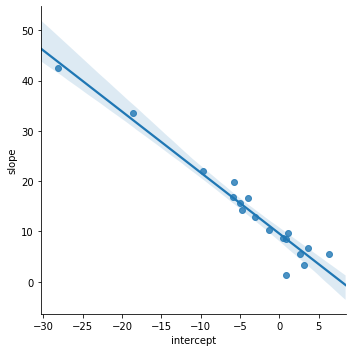

In [47]:
sns.lmplot(y="slope", x="intercept", data=source_df_3)

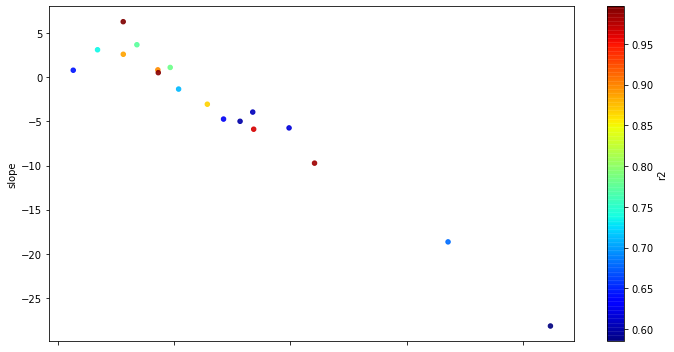

In [44]:
source_df_3.plot(kind= 'scatter', x="slope", y = "intercept",c="r2", colorbar=True, alpha = 0.9, cmap=plt.get_cmap("jet"), figsize=(10,5))
plt.ylabel("slope")
plt.xlabel("y-intercept")
plt.tight_layout()

In [65]:
mean1 = solvent_cooling_df_1['r2'].mean()
mean2 = solvent_antisolvent_df_1['r2'].mean()

mean3 = solvent_cooling_df_2['r2'].mean()
mean4 = solvent_antisolvent_df_2['r2'].mean()

mean5 = solvent_cooling_df_3['r2'].mean()
mean6 = solvent_antisolvent_df_3['r2'].mean()

print(mean1, mean2, mean3, mean4, mean5, mean6)

0.4011961082597772 0.5672889217102711 0.39789669761216323 0.5753677216845258 0.40264906498220127 0.5717675816889739


In [67]:
solvent_antisolvent_df_2.head(10)

,method,molecule,slope,intercept,r2
0,antisolvent,Isopropyl acetate,-2.679235,3.495162,0.901418
1,antisolvent,Water,-0.803409,4.572798,0.101451
2,antisolvent,Ethanol,-0.747076,5.079866,0.123162
3,antisolvent,Methanol,-1.285453,5.424190,0.379152
4,antisolvent,Isopropyl alcohol,-1.217616,9.020724,0.997630
5,antisolvent,water,-1.763159,5.111083,0.906718
6,antisolvent,PEG300,-2.602868,3.537741,0.828050
7,antisolvent,Ethanol,-2.003998,5.239939,0.365361
